# Fashion MNIST Project

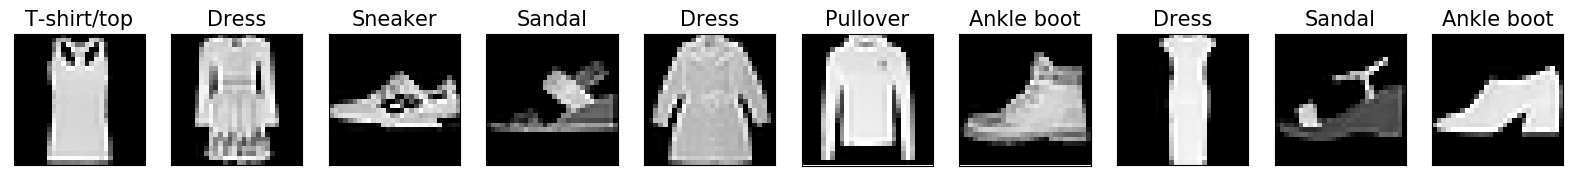

In [48]:
import pandas  as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick 
from pylab import rcParams
import matplotlib as mpl
from matplotlib.pyplot import figure
import random
import time
import gc
import os
from datetime import datetime
import seaborn as sns
from matplotlib.pylab import rcParams
sns.set_style("whitegrid")
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: python-dateutil>=2.7.3 in c:\users\yasmi\anaconda3\lib\site-packages (from pandas) (2.8.1)



In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [9]:
(trainX,trainY), (testX,testY) = fashion_mnist.load_data()

In [10]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\yasmi\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [11]:
trainX.shape

(60000, 28, 28)

**The class labels for Fashion MNIST are:**

Label :          0                1            2           3        4       5        6        7         8       9                


Description :    T-shirt/top  ,  Trouser  ,  Pullover ,   Dress ,   Coat,    Sandal ,  Shirt,    Sneaker ,  Bag   ,  Ankle boot


Our dataset consists 60,000 images and each image has 784 features. An image consists of 28x28 pixels, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

In [12]:
class_names = ['pants', 'sneakers','coat','shirt']

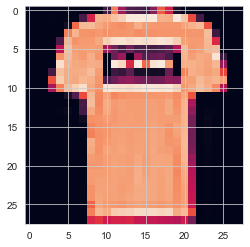

In [13]:
plt.imshow(trainX[1].reshape((28,28)))
plt.show()

# Shuffling the training set

**Shuffling the training dataset** - to get uniform samples for cross validation

We need to shuffle our training data to ensure that we don't miss out any digit in a cross validation fold.

**Cross-validation** is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

**Lets check a certian image at a certien index before shuffling**

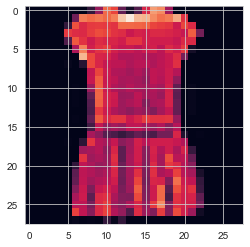

In [14]:
plt.imshow(trainX[3].reshape((28,28)))
plt.show()

In [15]:
import numpy as np
np.random.seed(42)   # if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(60000)
trainX, trainY = trainX[shuffle_index], trainY[shuffle_index]

**Now lets print the same index image after shuffling**

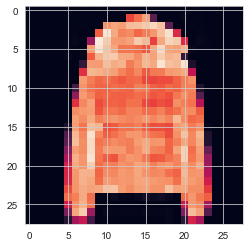

In [16]:
plt.imshow(trainX[3].reshape((28,28)))
plt.show()

# PCA for fashion MNIST

In [17]:
(trainX,trainY), (testX,testY) = fashion_mnist.load_data()

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

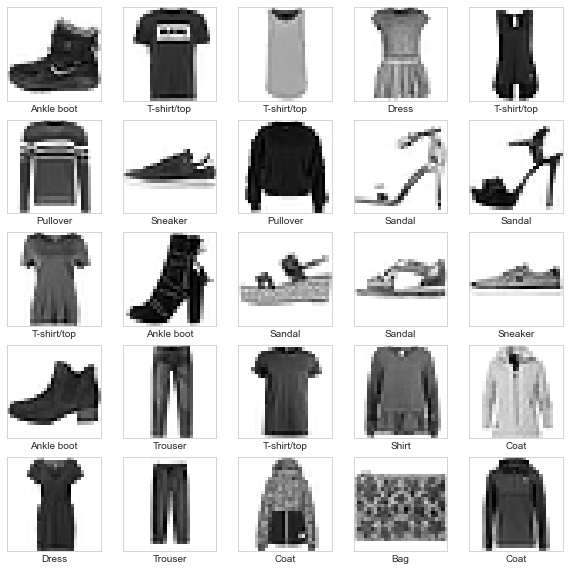

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i].reshape(28, 28), cmap="binary")
    plt.xlabel(class_names[trainY[i]])
plt.show()

In [20]:
from sklearn.decomposition import PCA

In [21]:
trainX = trainX.reshape((60000, 28, 28))
testX = testX.reshape((10000, 28, 28))

Each image (instance) in the dataset has 784 pixels (features) and value of each feature(pixel) ranges from 0 to 255, and this range is too wide , hence we would need to use feature scaling here to apply standardization to this dataset X_train, so that all the values of each feature (pixel) is in a small range (based on the standard deviation value).
The pixel values for the images lie between 0 to 255 now, which is a large range.

Let us normalize these values to a range from 0 to 1. To do this, we can simply divide each pixel value with 255

In [22]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [23]:
train_images_norm = trainX / 255.0
test_images_norm = testX / 255.0

In [24]:
image_train = trainX.reshape(60000,784)
image_test = testX.reshape(10000,784)

In [25]:
X_train = pd.DataFrame(image_train)
Y_train = trainY
X_test = pd.DataFrame(image_test)
Y_test = testY
print(Y_train)
X_train

[9 0 0 ... 3 0 5]


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [26]:
pca = PCA(n_components = 0.95)

In [27]:
X_reduced = pca.fit_transform(X_train)

In [28]:
pca.explained_variance_ratio_[:10]

array([0.29039228, 0.1775531 , 0.06019222, 0.04957428, 0.03847655,
       0.03460769, 0.02341691, 0.01905414, 0.01349843, 0.01314267])

In [29]:
pca = PCA(n_components = 179)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

95% variance compressed image


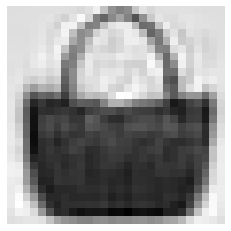

In [30]:
print('95% variance compressed image')
plt.imshow(X_recovered[100].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import numpy as np

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("prism")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

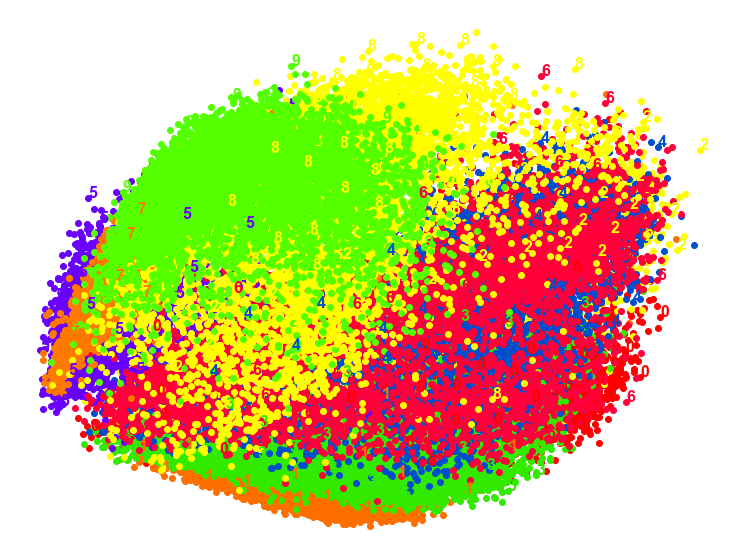

In [32]:
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X_train)
plot_digits(X_pca_reduced,Y_train)
plt.show()

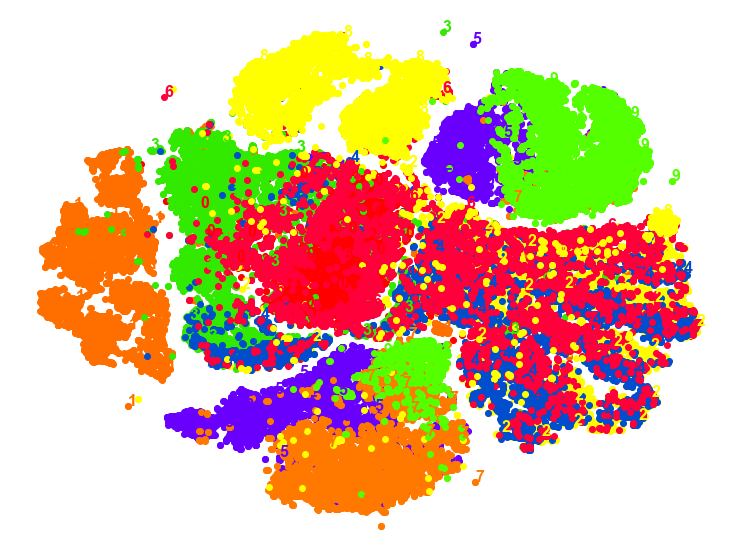

In [34]:
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding

pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
X_pca_tsne_reduced = pca_tsne.fit_transform(X_train)
plot_digits(X_pca_tsne_reduced, Y_train)
plt.show()

# Logistic Regression Classification with PCA and TNSE

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_pca_tsne_reduced, Y_train)

LogisticRegression()

In [36]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [37]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
X_pca_tsne_reduced_test = pca_tsne.fit_transform(X_test)

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, lr.predict(X_pca_tsne_reduced_test))

0.1776

**We can notice that the accuracy is realy low so we can try simple PCA with 2 components**

In [39]:
lr = LogisticRegression(max_iter=100000)
lr.fit(X_pca_reduced, Y_train)

LogisticRegression(max_iter=100000)

In [40]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(max_iter=100000)

In [41]:
X_pca_reduced_test = PCA(n_components=2, random_state=42).fit_transform(X_test)

In [42]:
accuracy_score(Y_test, lr.predict(X_pca_reduced_test))

0.5065

# Ensamle Learning with XGBoost 

In [43]:
from xgboost.sklearn import XGBClassifier

In [44]:
xg_boost = XGBClassifier(n_estimators=50, max_depth=5)
xg_boost.fit(X_pca_reduced,Y_train)
xg_boost.score(X_pca_reduced_test,Y_test) 

0.555

# Ensamble Learning with Random Forest 

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
from sklearn import metrics
rf = RandomForestClassifier(n_estimators=100 , n_jobs = -1, random_state =42, 
                                  max_depth=50)
rf.fit(X_pca_reduced,Y_train)
prediction_test = rf.predict(X_pca_reduced_test)
(metrics.accuracy_score(Y_test,prediction_test))

0.5122

In [49]:
report = classification_report(Y_test,xg_boost.predict(X_pca_reduced_test))
print(report)

              precision    recall  f1-score   support

           0       0.50      0.72      0.59      1000
           1       0.88      0.73      0.80      1000
           2       0.36      0.44      0.40      1000
           3       0.60      0.61      0.61      1000
           4       0.39      0.39      0.39      1000
           5       0.68      0.58      0.63      1000
           6       0.32      0.19      0.24      1000
           7       0.64      0.73      0.68      1000
           8       0.57      0.52      0.54      1000
           9       0.63      0.63      0.63      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.56      0.55     10000

